In [3]:
from models import MeshModel, IcosphereModel
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from models.spots import add_spots
from plots import plot_3D
from spectrum import simulate_spectrum
import astropy.units as u
import astropy.constants as const
import jax.numpy as jnp
import numpy as np
from transformer_payne import TransformerPayne, BlackbodyFlux

from jax import config
config.update('jax_platform_name', 'cpu')
config.update("jax_enable_x64", True)

In [4]:
base_temp = 5700
spot_temp = 20000
spot_diff = spot_temp - base_temp

In [5]:
bb = BlackbodyFlux()

In [6]:
m = IcosphereModel.construct(1000, u.solRad.to(u.cm), 1., 1., bb.to_parameters(dict(teff=base_temp)))
ms = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([spot_diff]),
              radii=jnp.array([0.25]),
              radius_factors=jnp.array([.75]),
              param_indices=jnp.array([0]))

/Users/majajablonska/miniconda/envs/tp-env/lib/python3.12/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float64 to dtype=int64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [18]:
TIMESTAMPS = np.linspace(0, 3600*10, 50)

In [19]:
mt = add_rotation(ms, 100, jnp.array([0., 0., 1.]))
mts = [evaluate_rotation(mt, t) for t in TIMESTAMPS]

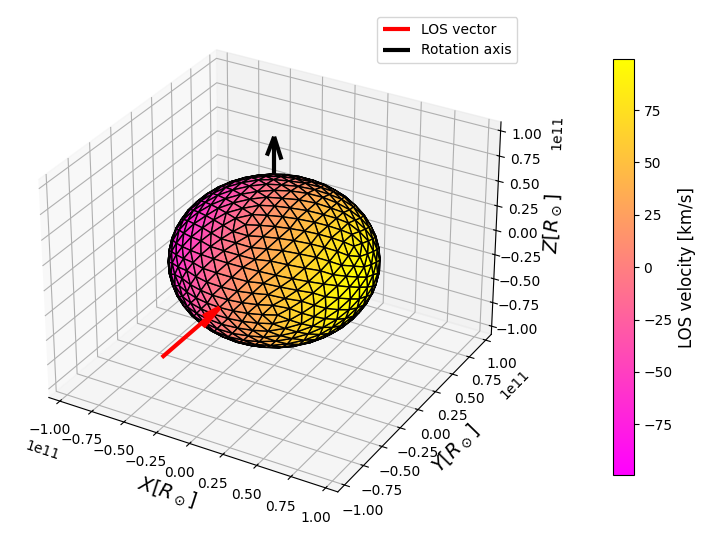

In [8]:
_, _ = plot_3D(mts[0], 'los_velocities', cmap='spring')

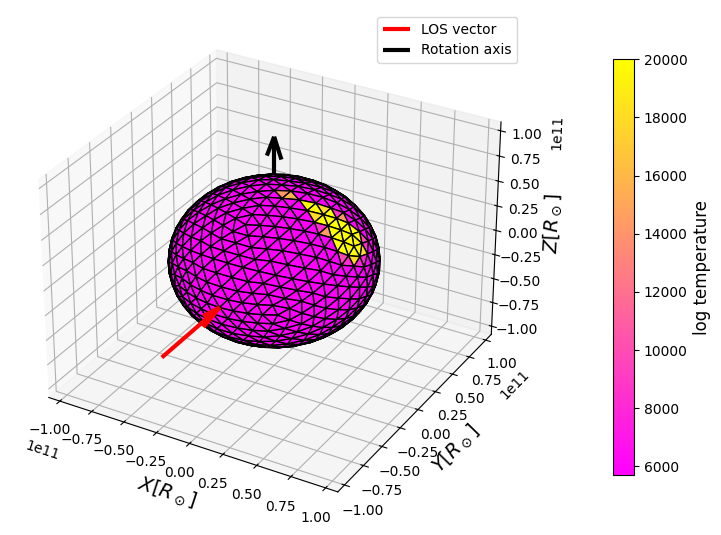

In [9]:
_, _ = plot_3D(mts[0], 0, cmap='spring', property_label='log temperature')

In [10]:
import matplotlib.pyplot as plt

vws = jnp.linspace(1000., 8000., 1000)

In [11]:
from spectrum.spectrum import spectrum_flash_sum, simulate_spectrum

In [12]:
len(mts)

50

In [23]:
TIMESTAMPS

array([    0.        ,   734.69387755,  1469.3877551 ,  2204.08163265,
        2938.7755102 ,  3673.46938776,  4408.16326531,  5142.85714286,
        5877.55102041,  6612.24489796,  7346.93877551,  8081.63265306,
        8816.32653061,  9551.02040816, 10285.71428571, 11020.40816327,
       11755.10204082, 12489.79591837, 13224.48979592, 13959.18367347,
       14693.87755102, 15428.57142857, 16163.26530612, 16897.95918367,
       17632.65306122, 18367.34693878, 19102.04081633, 19836.73469388,
       20571.42857143, 21306.12244898, 22040.81632653, 22775.51020408,
       23510.20408163, 24244.89795918, 24979.59183673, 25714.28571429,
       26448.97959184, 27183.67346939, 27918.36734694, 28653.06122449,
       29387.75510204, 30122.44897959, 30857.14285714, 31591.83673469,
       32326.53061224, 33061.2244898 , 33795.91836735, 34530.6122449 ,
       35265.30612245, 36000.        ])

In [13]:
specs = [simulate_spectrum(bb.intensity, mt0, jnp.log10(vws)) for mt0 in mts]

<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:64: SyntaxWarning: invalid escape sequence '\A'
<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:64: SyntaxWarning: invalid escape sequence '\A'
/var/folders/n6/5g0cjy9s6j9cgp2xbw_6c2v40000gn/T/ipykernel_6704/3816224931.py:22: SyntaxWarning: invalid escape sequence '\o'
  plot_ax.set_xlabel('$X [R_\odot]$', fontsize=14)
/var/folders/n6/5g0cjy9s6j9cgp2xbw_6c2v40000gn/T/ipykernel_6704/3816224931.py:23: SyntaxWarning: invalid escape sequence '\o'
  plot_ax.set_ylabel('$Y [R_\odot]$', fontsize=14)
/var/folders/n6/5g0cjy9s6j9cgp2xbw_6c2v40000gn/T/ipykernel_6704/3816224931.py:24: SyntaxWarning: invalid escape sequence '\o'
  plot_ax.set_zlabel('$Z [R_\odot]$', fontsize=14)
/var/folders/n6/5g0cjy9s6j9cgp2xbw_6c2v40000gn/T/ipykernel_67

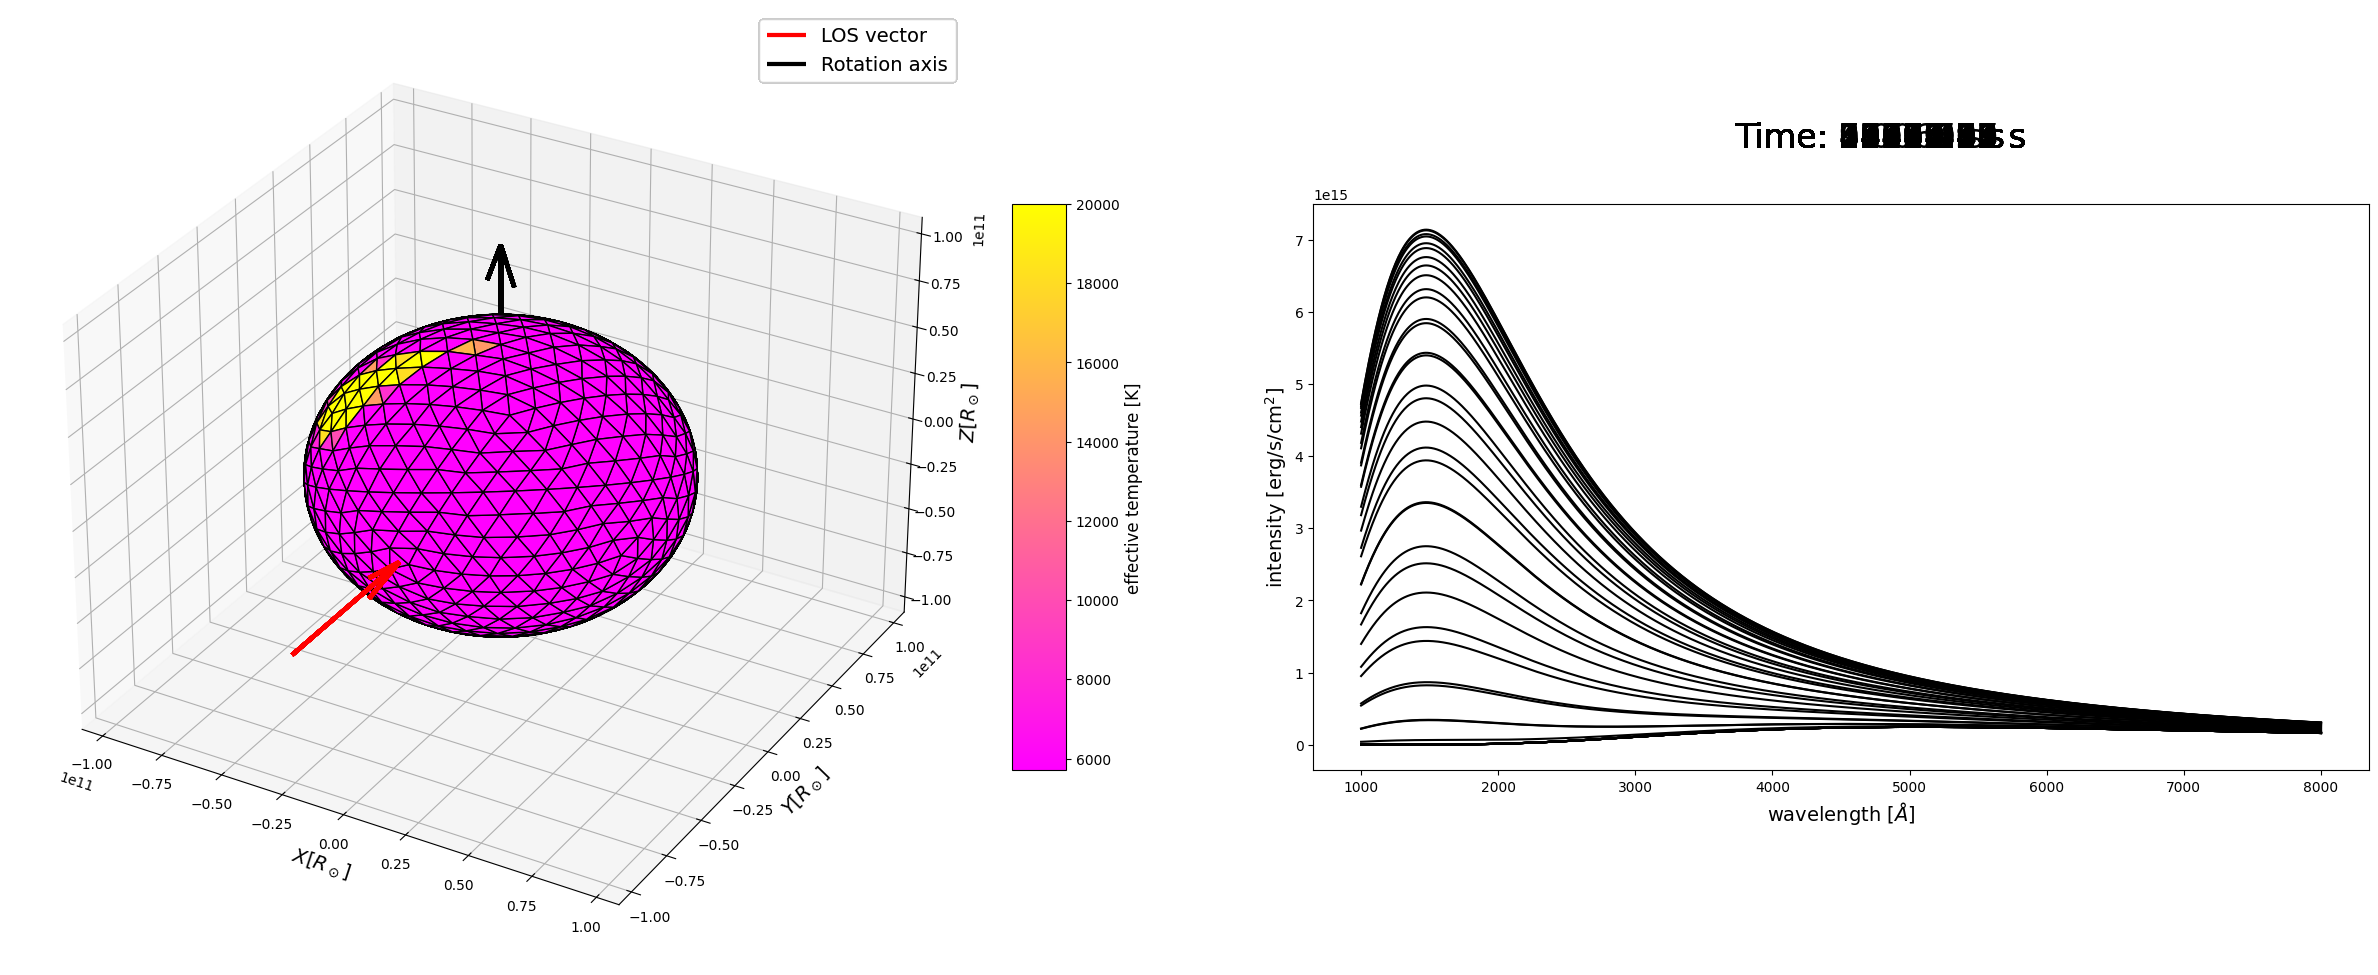

In [41]:
from celluloid import Camera
from plots.plot_mesh import _evaluate_to_be_mapped_property
import matplotlib as mpl
from mpl_toolkits.mplot3d import art3d

fig = plt.figure(figsize=(24, 10))
spec = fig.add_gridspec(10, 24)
plot_ax = fig.add_subplot(spec[:, :10], projection='3d')
cax = fig.add_subplot(spec[2:8, 10])
spectrum_ax = fig.add_subplot(spec[2:8, 13:])
camera = Camera(fig)
to_be_mapped, cbar_label = _evaluate_to_be_mapped_property(mts[0], 0)
cbar_label = "effective temperature [K]"
mode = "MESH"
cmap='spring'

mesh = mts[0]
axes_lim = 1.5*mesh.radius
plot_ax.set_xlim3d(-axes_lim, axes_lim)
plot_ax.set_ylim3d(-axes_lim, axes_lim)
plot_ax.set_zlim3d(-axes_lim, axes_lim)
plot_ax.set_xlabel('$X [R_\odot]$', fontsize=14)
plot_ax.set_ylabel('$Y [R_\odot]$', fontsize=14)
plot_ax.set_zlabel('$Z [R_\odot]$', fontsize=14)

normalized_los_vector = mesh.los_vector/np.linalg.norm(mesh.los_vector)
normalized_rotation_axis = mesh.rotation_axis/np.linalg.norm(mesh.rotation_axis)


norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
mappable = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.tight_layout()
timestamp_label = 's'


for i, (mesh, s) in enumerate(zip(mts, specs)):
    norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
    mappable = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

    if mode == 'MESH':
        vs2 = mesh.vertices[mesh.faces.astype(int)]
        face_colors = mpl.colormaps[cmap](norm(to_be_mapped))
        p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black", zorder=0)
        
        plot_ax.add_collection(p)
        plot_ax.quiver(*(-2.0*mesh.radius*normalized_los_vector), *(mesh.radius*normalized_los_vector),
                color='red', linewidth=3., label='LOS vector', zorder=2)
        plot_ax.quiver(*(0.75*mesh.radius*normalized_rotation_axis), *(mesh.radius*normalized_rotation_axis),
                        color='black', linewidth=3., label='Rotation axis', zorder=2)
        if i == 0:
            plot_ax.legend(fontsize=14)
        
        spectrum_ax.text(0.4, 1.1, "Time: {ts:.2f} {timestamp_label}".format(ts=TIMESTAMPS[i], timestamp_label=timestamp_label),
                         fontsize=24,
                         transform=spectrum_ax.transAxes)
    else:
        p = plot_ax.scatter(mesh.centers[:, 0], mesh.centers[:, 1], mesh.centers[:, 2],
                            c=to_be_mapped, cmap=cmap, norm=norm)
        
    cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, cax=cax)
    cbar.set_label(cbar_label, fontsize=12)
    spectrum_ax.plot(vws, s[:, 0], color='black')
    spectrum_ax.set_ylabel('intensity [erg/s/cm$^2$]', fontsize=14)
    spectrum_ax.set_xlabel('wavelength [$\AA$]', fontsize=14)
    
    camera.snap()

In [42]:
a = camera.animate()
a.save("test.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [47]:
from plots.plot_mesh import animate_mesh_and_spectra

ValueError: 'test2.gif' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

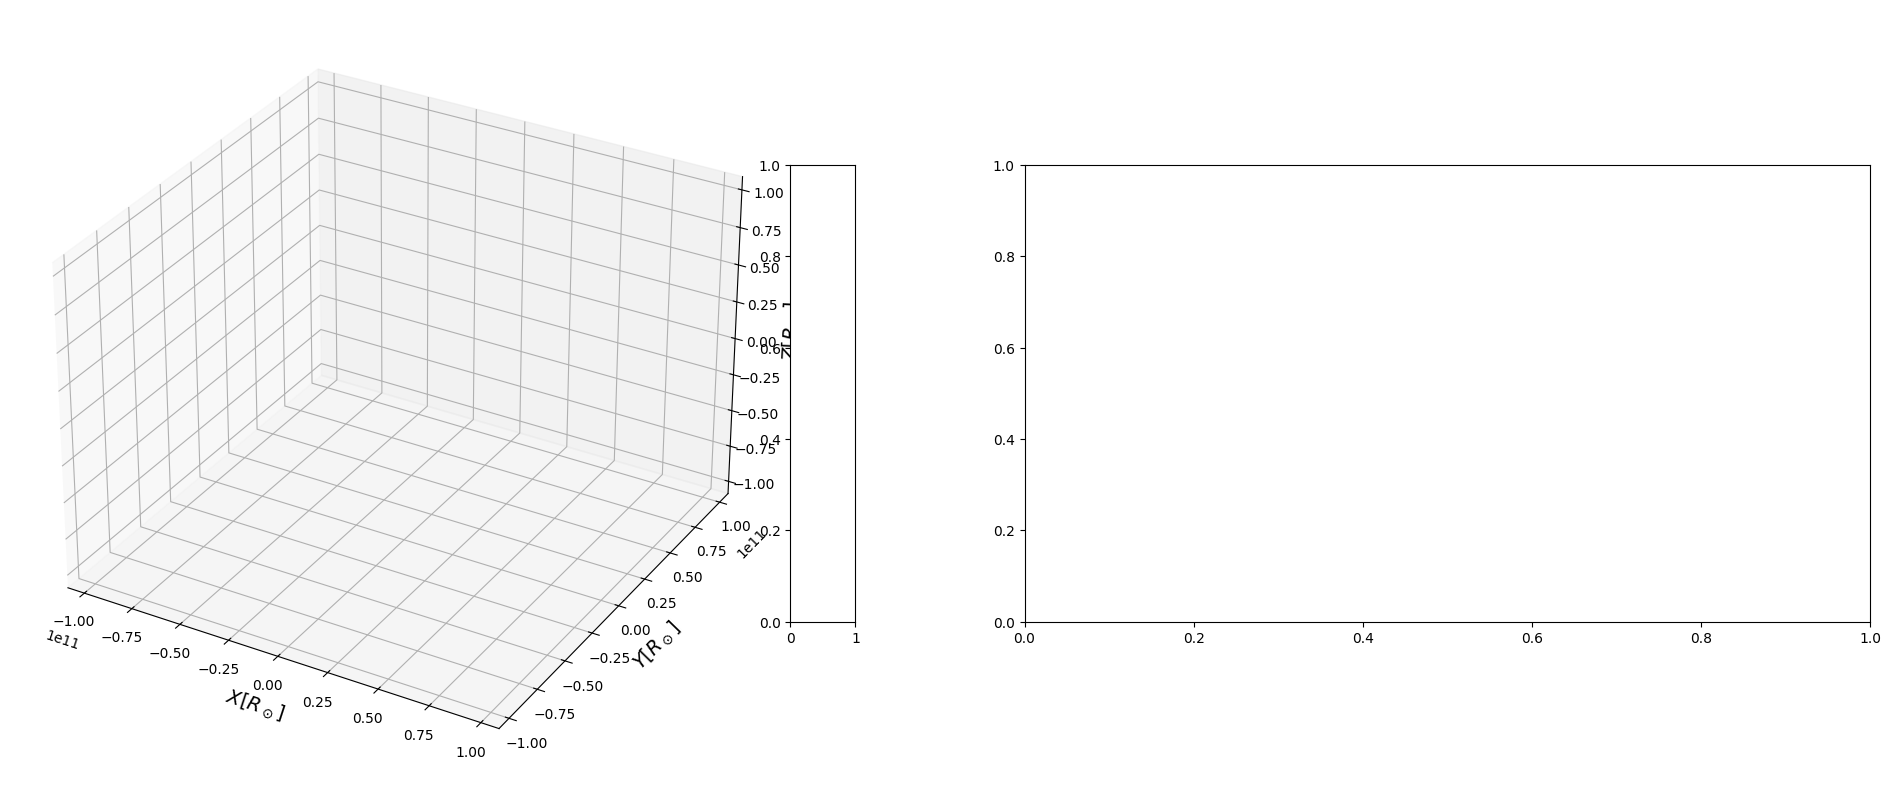

In [48]:
animate_mesh_and_spectra(mts,TIMESTAMPS, vws, specs, "test2.gif")